### Credit :
### Many Many thanks to NAAMII (https://www.naamii.org.np/ ) for organizing "2nd Nepal winter school in AI"with world class experts and enthusiastic learners from around the globe.
**** 
I am extremly thankful to <b> Dr. Binod Bhattarai (General Co-chair Second Nepal Winter School in AI, 2019) for presenting detailed lectures on  "Feature Representations : Classical vs Modern" and providing a wonderful lab task.</b> <u>His lectures and lab task provided me insights on the application of linear algebra and its wonders to real world. Below code is my solution to  the lab task after attending his wonderful lectures.</u>  

*** 
<font color = Blue><b>At present Dr. Bhattarai is an Assistant Professor in the Natural and Computing School of the University of Aberdeen. His  research interests are machine learning, computer vision, and medical image analysis. You can acess his home page @ https://sites.google.com/view/bbinod/home </b> </font>

# **Face Recognition using Eigenfaces**
---




####We will be using [FEI Face Database](https://fei.edu.br/~cet/facedatabase.html)  for our face recognition purpose. 
*Datasets consist of faces of 200 people and each person has two frontal images (one with a neutral expression and the other with a smiling facial expression), there are 400 full frontal face images manually registered and cropped.*
<br><br>**We will use normalized, equalized and cropped frontal face images.**


Add dataset in your Colab using:


```
!wget <link> 
```



Unzip your zip files using:
```
!unzip <name_of_your_zip_file>
```

In [3]:
import PIL
print('Pillow Version:', PIL.__version__)

Pillow Version: 6.2.0


In [1]:
# importing all the necessary packages 
import numpy as np
from numpy import array
from matplotlib import pyplot as plt
from PIL import Image

###Vectorization
We will use Python Imaging Library (PIL) to load images from files.
`PIL.Image.open()` Opens and identifies the given image file.`Note` Open into greyscale, or L(Luminance) mode: 

```
img = Image.open(f'{i}a.jpg').convert('L')  # i ranges from 1 to 200
img = img.resize((width, height),Image.ANTIALIAS) # for speed
```
Rearrange each Face image N x N into a column vector N<sup>2</sup> x 1. After Vectorization the shape of face matrix should be 200 x (width x height)


### The IMAGE PROCESSING PART  --> Resizing and flattening (making Column vector  = $N^{2} *1$) each  image to $N^{2}*1$  where $N^{2}$ = a * b dimension of each image and a = b

In [2]:
img_array = []
Vec = []
def data_process(i):
                        imag = Image.open(f'img dt1/{i}a.jpg') ## retreive images from current directory ++
                          ## ++ using i' current value eg (f'img dt1/{i}a.jpg')- if i =1 then 1a image retreived  
                              # print(imag.format)             
                          # print(imag.mode)
                          # print(imag.size)
                          #imag.show()   # display image on desktop by the os        
                        im = imag.convert('L')
                                 # print(im.mode)
                        width, height = 50,50
                        rszed_img = im.resize((width, height),Image.ANTIALIAS)
                             # print(rszed_img.size)
                             #rszed_img.show()
                             # print(rszed_img.format)
                           ## now convert the resized image into numpy array
                        img_array = np.array(rszed_img)

                          # now flatten the 70*70 matrix array into N^2 * 1 column vector = 4900*1 column vector
                        col_vect_img = img_array.flatten()
                               # print(col_vect_img.shape)
                        Vec.append(col_vect_img)
                

### import images from a dataset and store  in the image aray
for i in range(1,101):
           
               for j in range(1,3):   
                       
                     data_process(i)

                          
                      
                        




In [3]:
### just for check whether the vector formed is of size equal to number of images in the folder or not as there are 200 images  
print(Vec[:2])
print(len(Vec))
type(Vec)

[array([189, 190, 188, ..., 122, 124, 126], dtype=uint8), array([189, 190, 188, ..., 122, 124, 126], dtype=uint8)]
200


list

## Check face_matrix and its dimensions

In [4]:
face_matrix = array(Vec)  # convert list into 200*4900  matrix
print(face_matrix)
print(face_matrix.shape)


[[189 190 188 ... 122 124 126]
 [189 190 188 ... 122 124 126]
 [191 190 191 ... 117 122 124]
 ...
 [212 211 211 ...  19  28  25]
 [190 191 191 ...   7  12  18]
 [190 191 191 ...   7  12  18]]
(200, 2500)


In [5]:
print(face_matrix[0])

[189 190 188 ... 122 124 126]


## Find mean_face

In [31]:
from numpy import array
from numpy import mean
mean_face = mean(face_matrix, axis =0)  # take mean values of the overall matrix column wise where each column ++ 
print(mean_face.shape)  ##++ represents the  particular pixel value of all pictures at that coordinate positon        
print(type(mean_face))
print("Mean Face of all pictures column wise")
print(mean_face)

(2500,)
<class 'numpy.ndarray'>
Mean Face of all pictures column wise
[189.71 189.94 189.5  ...  70.9   78.02  82.7 ]


## Plot the mean face 

Text(0.5, 1.0, 'Mean Face')

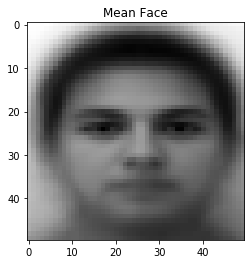

In [33]:
from matplotlib import pyplot as plt
plt.imshow(mean_face.reshape(50,50),cmap='gray'); 
plt.title('Mean Face')

### Perform Normalization


In [34]:
featured_vec= []
for i in range(0,200):
      featured_vec.append(face_matrix[i]-mean_face)
featured_vec= array(featured_vec)
print(featured_vec)
## type(featured_vec)

[[-7.100e-01  6.000e-02 -1.500e+00 ...  5.110e+01  4.598e+01  4.330e+01]
 [-7.100e-01  6.000e-02 -1.500e+00 ...  5.110e+01  4.598e+01  4.330e+01]
 [ 1.290e+00  6.000e-02  1.500e+00 ...  4.610e+01  4.398e+01  4.130e+01]
 ...
 [ 2.229e+01  2.106e+01  2.150e+01 ... -5.190e+01 -5.002e+01 -5.770e+01]
 [ 2.900e-01  1.060e+00  1.500e+00 ... -6.390e+01 -6.602e+01 -6.470e+01]
 [ 2.900e-01  1.060e+00  1.500e+00 ... -6.390e+01 -6.602e+01 -6.470e+01]]


## Calculate Covariance Matrix as well as eigen vector and values using SVD

In [65]:
#np.cov expects features as rows and observations as columns, so transpose
# Calculate covariance matrix

Cvrnc_matrix = np.cov(featured_vec.transpose())
Cvrnc_matrix.shape
#Find Eigen Vectors and Eigen Values, you can use SVD from scipy.linalg.svd  or using numpy

from numpy.linalg import svd
U, S, V = svd(Cvrnc_matrix)
print("egn_values")
print(S)
print("egn_vectors")
print(U)
egn_values, egn_vectors = S, U

egn_values
[1.32244603e+06 5.63856328e+05 2.61985490e+05 ... 4.86327010e-11
 3.80604208e-11 3.01829438e-11]
egn_vectors
[[-0.00680905 -0.00176453  0.00555229 ... -0.00167589  0.08376401
   0.0208167 ]
 [-0.00653757 -0.00189132  0.00488903 ...  0.00253621 -0.0453591
  -0.03331911]
 [-0.00701873 -0.00151159  0.00587559 ... -0.11609073 -0.34885695
  -0.06606111]
 ...
 [ 0.02124169  0.01884357 -0.02147525 ... -0.00131741 -0.00837382
   0.0024166 ]
 [ 0.02401252  0.01694744 -0.02076151 ... -0.00332334 -0.00666303
  -0.00879886]
 [ 0.02290666  0.01962022 -0.0209402  ...  0.01611961 -0.02547527
  -0.00341989]]


In [66]:
print("egn_vectors[0]")
print(U[0])
type(S)

egn_vectors[0]
[-0.00680905 -0.00176453  0.00555229 ... -0.00167589  0.08376401
  0.0208167 ]


numpy.ndarray


Plot the first 10 Eigenfaces
```
fig, axs = plt.subplots(1,3,figsize=(15,5))
for i in np.arange(10):
    ax = plt.subplot(2,5,i+1)
    img = <eigen_vectors>[:,i].reshape(height,width)
    plt.imshow(img, cmap='gray')
fig.suptitle("First 10 Eigenfaces", fontsize=16)
```



Text(0.5, 0.98, 'First 10 training eigen faces/images')

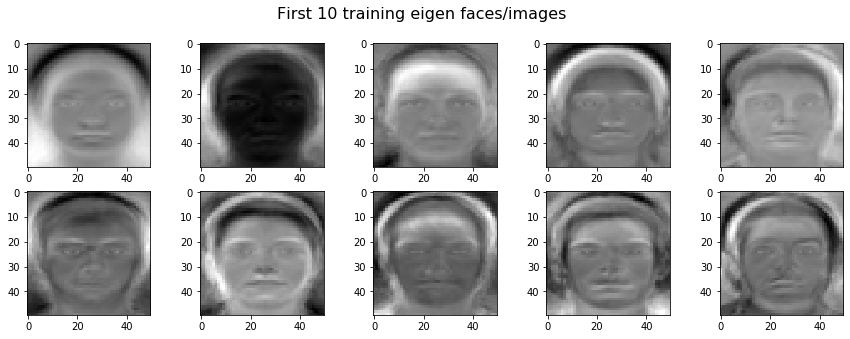

In [85]:
## Seeing the 10 eigen faces
fig, axs = plt.subplots(1,3,figsize=(15,5))
for i in np.arange(10):
    ax = plt.subplot(2,5,i+1)
    
    img = egn_vectors[:,i].reshape(50,50)
    plt.imshow(img, cmap='gray')
fig.suptitle("First 10 training eigen faces/images", fontsize=16)

## Seeing the normal 10 images from the training set

Text(0.5, 0.98, 'First 10 Eigenfaces')

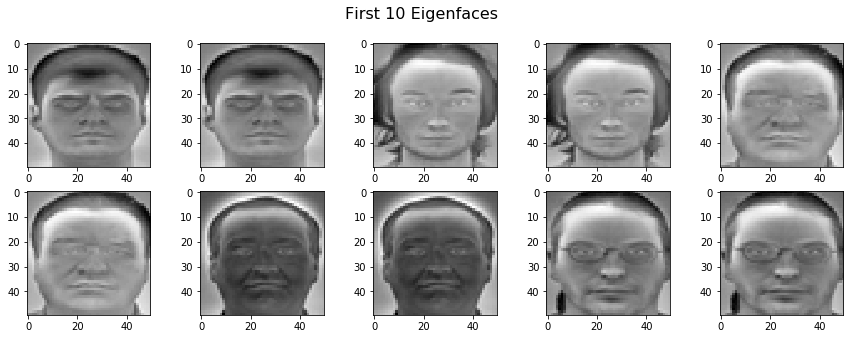

In [84]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
for i in np.arange(10):
    ax = plt.subplot(2,5,i+1)
    img = featured_vec[i,:].reshape(50,50)
    plt.imshow(img, cmap='gray')
fig.suptitle("First 10 Eigenfaces", fontsize=16)

## Second image in data set looks like

Text(0.5, 1.0, 'Second  Image')

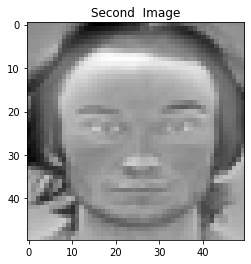

In [83]:
plt.imshow(featured_vec[2].reshape(50,50),cmap='gray'); 
plt.title('Second  Image')

Reconstruction with increasing Eigenfaces
```
fig, axs = plt.subplots(2,5,figsize=(15,6))
for k, i in zip([0,1,9,19,39,79,159,199,399,799],np.arange(10)):
    # Reconstruct the first picture '2a.jpg' whose index is 0.
    # Get PC scores of the images (wights)
    # Reconstruct first face in dataset using k PCs (projected_face)
    ax = plt.subplot(2,5,i+1)
    ax.set_title("k = "+str(k+1))
    plt.imshow(projected_face.reshape(height,width)+mean_face.reshape(height,width),cmap='gray');
```


Text(0.5, 0.98, 'Reconstruction with Increasing Eigenfaces')

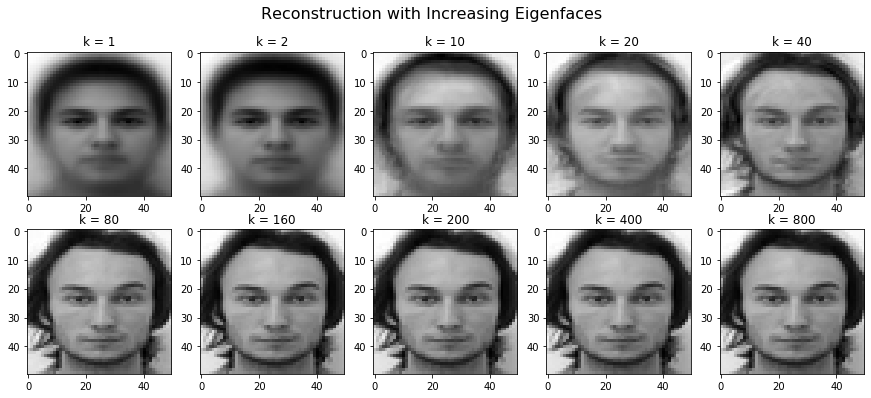

In [71]:
# Reconstruct second image with increasing Eigenfaces
fig, axs = plt.subplots(2,5,figsize=(15,6))
for k, i in zip([0,1,9,19,39,79,159,199,399,799],np.arange(10)):
    # Reconstruct the first picture '2a.jpg' whose index is 1.
    weight = featured_vec[2,:].dot( egn_vectors[:,:k]) # Get PC scores of the images
    projected_face = weight.dot( egn_vectors[:,:k].T) # Reconstruct first face in dataset using k PCs
    ax = plt.subplot(2,5,i+1)
    ax.set_title("k = "+str(k+1))
    plt.imshow(projected_face.reshape(50,50)+mean_face.reshape(50,50),cmap='gray');
fig.suptitle(("Reconstruction with Increasing Eigenfaces"), fontsize=16)


Text(0.5, 1.0, 'First Face')

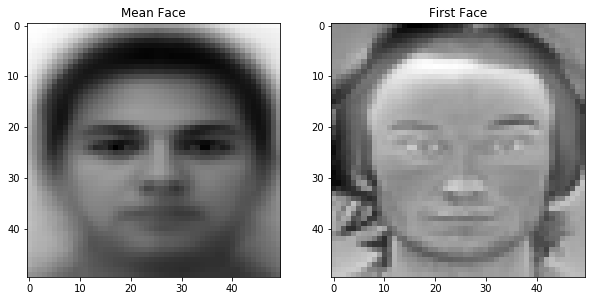

In [77]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(mean_face.reshape(50,50),cmap='gray'); 
plt.title('Mean Face')
plt.subplot(1,2,2)
# Second image in data set looks like
plt.imshow(featured_vec[2].reshape(50,50),cmap='gray'); 
plt.title('First Face')

#### Credits :
 1. "Face Representations: Classical vs Modern" Binod Bhattarai,Imperial College London,NAAMII Nepal 
 2. https://www.cin.ufpe.br/~rps/Artigos/Face%20Recognition%20Using%20Eigenfaces.pdf
 3. http://www.vision.jhu.edu/teaching/vision08/Handouts/case_study_pca1.pdf    